# About the Workbook

This is an analytical review of the Diabetes dataset (please see the details of the dataset below).
The work is still in progress. I try to give more details as I go on.

# About Dataset

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Columns
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction:  indicates the function which scores likelihood of diabetes based on family history:  it provides a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

# Packages and reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv') # reading in the dataset with pandas
np.random.seed(42) # setting the random seed

# Surface level look on the data

In [3]:
#look at the data on a surface level: 
#This includes the structure of the dataset as a table, 
#details about the features and 
#useful statistics via the describe function
display('Shape: ----------------------',df.shape) #how the dataset is built up: how many lines and columns are
display('head: ----------------------',df.head()) #the first 5 lines of the DS (Data Set)
display('tail: ----------------------',df.tail()) #the last 5 lines of the DS
display('info: ----------------------') 
display(df.info()) #the datatypes of each columns, and is there any null value there
display('describe: ----------------------',df.describe()) #describing statistics about the DS
display('Columns: ----------------------',df.columns) #the exact name of the columns, useful for later (ex.: use/copy into code)

'Shape: ----------------------'

(768, 9)

'head: ----------------------'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


'tail: ----------------------'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


'info: ----------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

'describe: ----------------------'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


'Columns: ----------------------'

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## What we can read from the initial analysis

* the dataframe contains 768 instances and 9 columns 8 of them are features and 1 ('Outcome') is the class indicator
among them are intiger and float values as data types
* as per .info() there is no Nan value in the data
* but there are a lot of 0 values in columns where it is not sensible to have it as 0 value:
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'
* these are probably missing values and need to be addressed later

-what the describe function tells us-
* the mean value is less then the median in case of: 'BloodPressure', 'SkinThickness', 'BMI' 
* the mean value is more then the median in case of: 'Pregnancies', 'Glucose', 'Insulin'*, 'DiabetesPedigreeFunction'*, 'Age'
* and much more in case of: 'Insulin', 'DiabetesPedigreeFunction',
* There is notably a large difference between 75th %tile and max values of the predictors: 'Pregnancies', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' 'Age'
* Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.
* Target variable/Dependent variable ('Outcome') is discrete, categorical, binary in nature. (0 = No disease, 1 = Disease)

In [4]:
#let's see how the outcome is balanced:
display('balance:',df.Outcome.value_counts(), '----------------')

#let's look how many zeros are we dealing with per columns:
zero_count_dict = {}
for col in df.columns:
    zero_count_dict[col] = df[col].value_counts().sort_index().iloc[0]
display('zero counts:',zero_count_dict)

'balance:'

0    500
1    268
Name: Outcome, dtype: int64

'----------------'

'zero counts:'

{'Pregnancies': 111,
 'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 1,
 'Age': 63,
 'Outcome': 500}

As we can see the DS is fairly imbalanced. It is tilted toward 'not having the disease' almost 2 to 1.

In [5]:
# creating a balanced set with random sampling for the better distribution visualization.
# This way the ratios are representative

# We separate the two class:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

#and random sample the same amount of instances from the higher represented '0' class to match the available '1' class instances
df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp]) #putting back the two class together

display('balance:',df_bal.Outcome.value_counts()) #check whether we done it correctly and the two class is in balance now

'balance:'

1    268
0    268
Name: Outcome, dtype: int64

# Initial Assumption

We can read about the pathology here, to gather insights for our initial assumption: https://en.wikipedia.org/wiki/Diabetes#Causes
> Type 2 diabetes is characterized by insulin resistance, which may be combined with relatively reduced insulin secretion.[14] The defective responsiveness of body tissues to insulin is believed to involve the insulin receptor. However, the specific defects are not known. Diabetes mellitus cases due to a known defect are classified separately. Type 2 diabetes is the most common type of diabetes mellitus accounting for 95% of diabetes.[2] Many people with type 2 diabetes have evidence of prediabetes 
**(impaired fasting glucose and/or impaired glucose tolerance)** 
before meeting the criteria for type 2 diabetes.[65] The progression of prediabetes to overt type 2 diabetes can be slowed or reversed by lifestyle changes or medications that improve insulin sensitivity or reduce the liver's glucose production.[66]
> 
> **Type 2 diabetes is primarily due to lifestyle factors and genetics.**[67] A number of lifestyle factors are known to be important to the development of type 2 diabetes, **including obesity** (defined by a **body mass index of greater than 30**), lack of physical activity, poor diet, stress, and urbanization.[46] Excess body fat is associated with 30% of cases in people of Chinese and Japanese descent, 60–80% of cases in those of European and African descent, and 100% of Pima Indians and Pacific Islanders.[14] Even those who are not obese may have a high waist–hip ratio.[14]
> 
> Dietary factors such as sugar-sweetened drinks are associated with an increased risk.[68][69] The type of fats in the diet is also important, with saturated fat and trans fats increasing the risk and polyunsaturated and monounsaturated fat decreasing the risk.[67] Eating white rice excessively may increase the risk of diabetes, especially in Chinese and Japanese people.[70] Lack of physical activity may increase the risk of diabetes in some people.[71]

**Given the pathology of Diabetes the primal assumption is that the following factors might forcast the outcome:**
* Glucose level in a glucose tolerance test (Higher the glucose higher the chance of diabetes)
* BMI (Higher the BMI higher the chance of diabetes)
* Diabetes family history (Higher the family incidence higher the chance of diabetes)

Let's look into these features in more in depth

1 : Glucose
2 : BMI
3 : DiabetesPedigreeFunction


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1080 with 0 Axes>

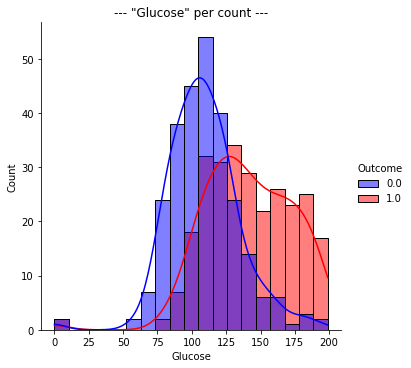

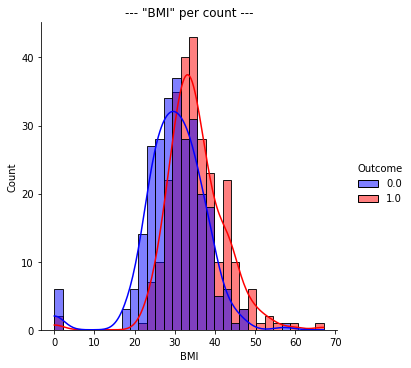

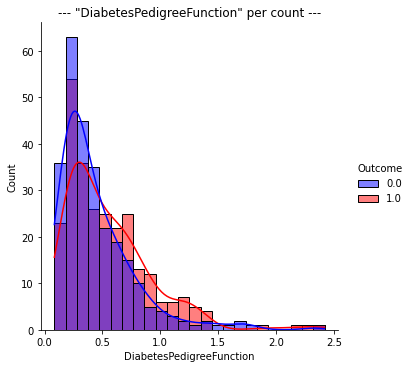

In [6]:
# it is vital that we stick to the same coloring of the classes troughout the analysis
palette = {0: 'blue', 1: 'red'} # so we define our core color coding for the classes, 
        # blue for 'not having' and red for 'having' the condition
        # I use this variable as a global one ('palette') and reference in my visualizations


# See the distribution via a displot with kde
features_listed = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
plt.figure(figsize = [20, 15])
counter = 0
for i in features_listed:
    counter += 1
    print(counter, ':', i)
    sns.displot(data = df_bal, kde=True, x = df[str(i)], hue='Outcome', palette=palette)
    plt.title(f'--- "{i}" per count ---')
plt.plot()
plt.show

What we can see from these figures?

Distribution of these values:
* Glucose level - outcome 0: normal distribution | outcome 1:  bimodal distribution with a global maximum at 130 and a local max at 160 mmol/L
* BMI - outcome 0: normal distribution | outcome 1: binomial distribution
* Diabetes family history - outcome 0: normal distribution, positive skewed | outcome 1: binomial distribution, positive skewed

As we have a balanced subset of data we can see that there are indeed values where one of the type of outcome surpasses the other in numbers as we go along the x axes. These inflexion points are the following:
* In case of glucose it is betveen 120-130
* for BMI is at 30, very well confirming our source description above
* for Diabetes Pedigree it is at 0.5


# Look at all the features together as well

To see whether there are other features in the DS, we might consider including in our analysis other than we discussed earlier.

We are looking for the distribution of the classes, and whether they are distinctly separated per features.
We will use the following charts:
* histogram
* boxplot
* correlation heatmap

In [7]:
# custom function for data vizualization - this creates nice charts in a compact from
def look_at_distr_hist(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        print('look at the distribution for all numeric variables')
        for i in df_num.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette=palette, kde=True)
            plt.title(f'--- "{i}" per count ---')
        plt.plot()

    #look at the distribution for all categ variables
    if df_cat is not None:
        print('look at the distribution for all categorical variables')
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_cat.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette=palette)
            plt.title(f'--- "{i}" per count ---')
    plt.plot();
    

look at the distribution for all numeric variables
1 : Pregnancies
2 : Glucose
3 : BloodPressure
4 : SkinThickness
5 : Insulin
6 : BMI
7 : DiabetesPedigreeFunction
8 : Age
9 : Outcome


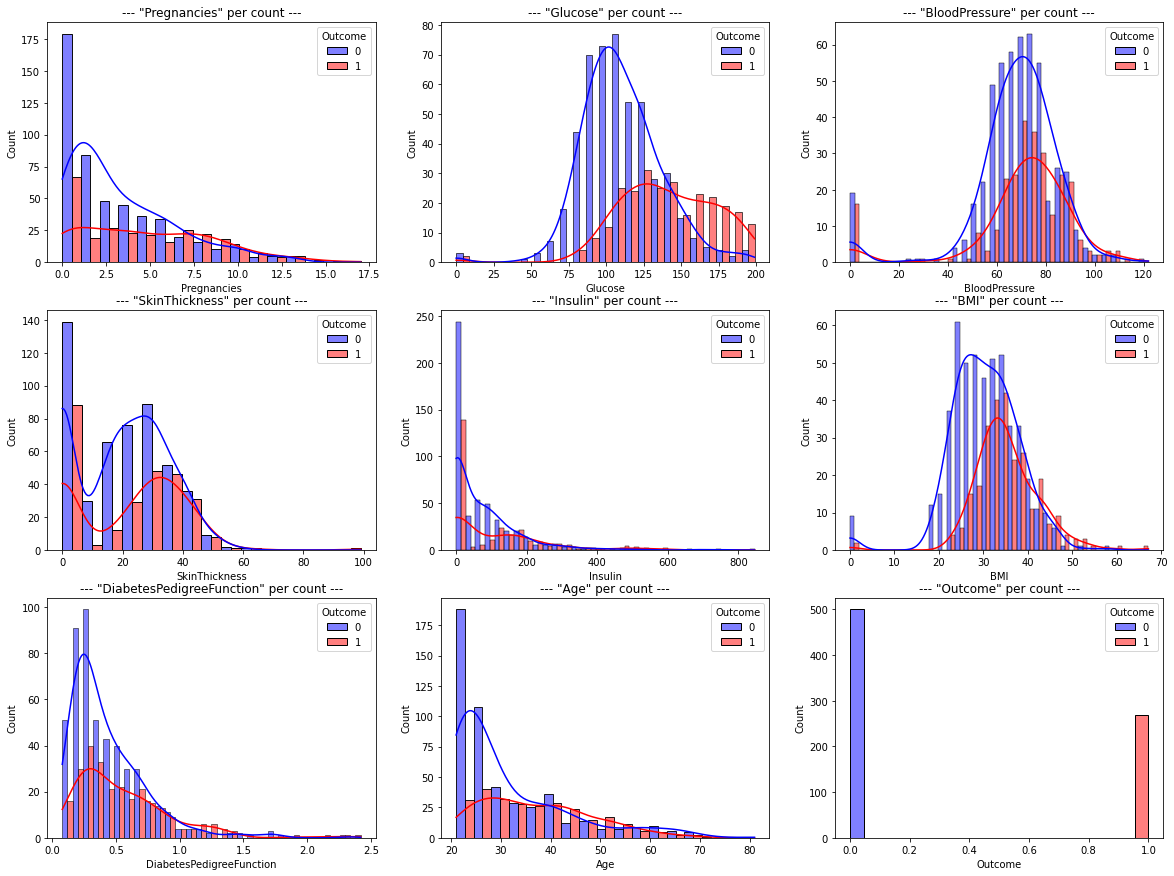

In [8]:
#See the distribution of all the features via histograms
look_at_distr_hist(df_num=df_bal, class_feature="Outcome")

look at the distribution for all numeric variables
1 : Pregnancies
2 : Glucose
3 : BloodPressure
4 : SkinThickness
5 : Insulin
6 : BMI
7 : DiabetesPedigreeFunction
8 : Age
9 : Outcome


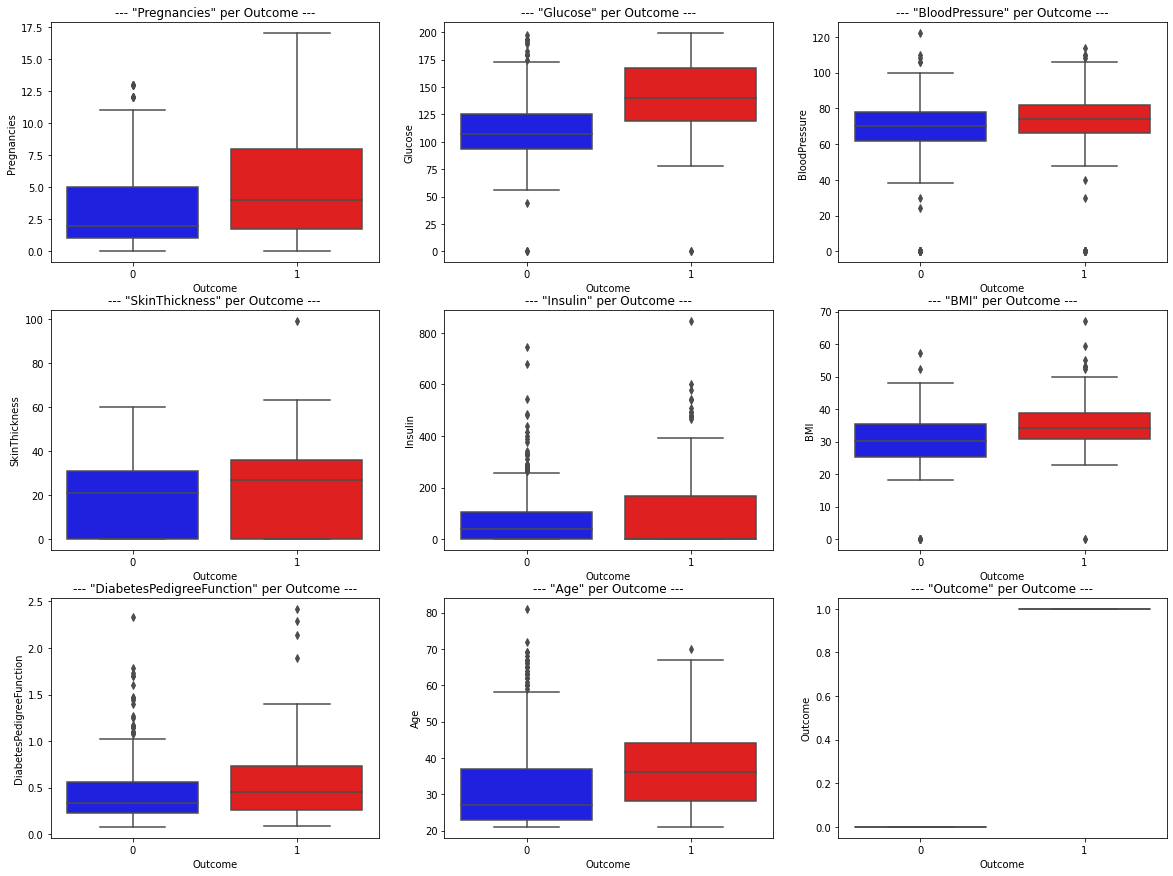

In [9]:
# custom function for data vizualization for boxplot
def look_at_distr_box(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        print('look at the distribution for all numeric variables')
        for i in df_num.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.boxplot(data = df, y = df[str(i)], x = df[class_feature], dodge=True, palette=palette)
            plt.title(f'--- "{i}" per {class_feature} ---')
        plt.plot()

    #look at the distribution for all categ variables
    if df_cat is not None:
        print('look at the distribution for all categorical variables')
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_cat.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.boxplot(data = df, x = df[str(i)], y = df[class_feature], palette=palette)
            plt.title(f'--- "{i}" per {class_feature} ---')
    plt.plot();

look_at_distr_box(df_num=df_bal, class_feature="Outcome")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


<AxesSubplot:>

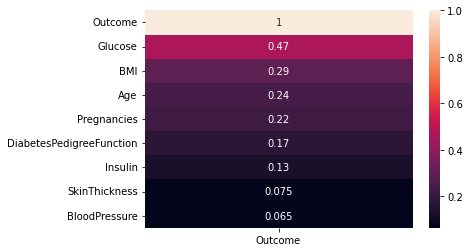

In [10]:
# draw a correlation matrix to see what features are corralating to the outcome the most:
display(df.corr().sort_values('Outcome', ascending=False))
correlation = df.corr().sort_values('Outcome', ascending=False)[['Outcome']]
sns.heatmap(correlation, annot=True)


If we take a look into our graphs above we can make some observations:

2 of the 3 features which we considered in our intitial assumptions proven to be indeed the most significant ones having connection to the disease: 

* Glucose level
* BMI

Diabetes Pedigree function although ended up not so descriptive as we anticipated towards the Outcome, being only the 5th if we sort our correlations.

The 4 most significant indicators in diabetes incidence according to correlation to the Outcome:
* Glucose level
* BMI
* Age
* Pregnancies

According to these we will go forward with **Glucose level and BMI** from now on. (if we would wanted to build a model these above would proven useful as well, but this workbook is focused on analysis)

# The two key feature: Glucose level and BMI 

In [11]:
# as we have discussed in the beggining there are 0 values in these columns, 
# which makes no sense so these can be considered as missing values.
# now we remove these instances to clean the DS
# as this action probably will have an effect on the balance we start with the intial set and sample again if necessary

print(df.shape)
df = df[df['Glucose'] != 0]

print(df.shape)
df = df[df['BMI'] != 0]
print(df.shape)

# balance
display('balance:',df.Outcome.value_counts()) #look at the current balance: as we can see we lost 4 points of data in the '1' class

(768, 9)
(763, 9)
(752, 9)


'balance:'

0    488
1    264
Name: Outcome, dtype: int64

In [12]:
# Again, creating a balanced set with random sampling for the better distribution visualization.
# This way the ratios are representative

# We separate the two class:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

#and random sample the same amount of instances from the higher represented '0' class to match the available '1' class instances
df_d0_samp = df_d0.sample(264,replace = False) # this time 264 is the sample number for reason as we see above
df_bal = pd.concat([df_d1, df_d0_samp]) #putting back the two class together

display('balance:',df_bal.Outcome.value_counts()) #check whether we done it correctly and the two class is in balance now

'balance:'

1    264
0    264
Name: Outcome, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

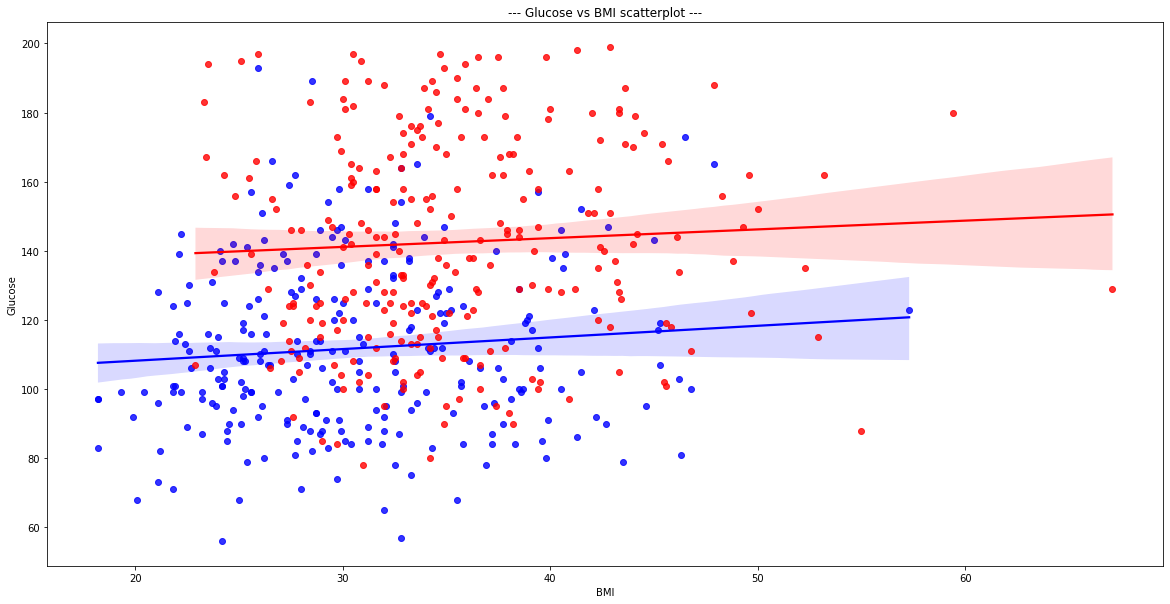

In [13]:
# Let's look closer at these Glucose vs BMI and their relative distribution to the Outcome in a regression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='BMI', y='Glucose', data=df_bal[df_bal['Outcome'] == 0], color='blue')
sns.regplot(x='BMI', y='Glucose', data=df_bal[df_bal['Outcome'] == 1], color='red')
plt.title('--- Glucose vs BMI scatterplot ---')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

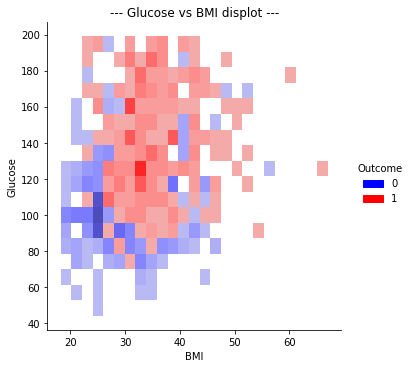

In [14]:
# Let's look closer at Glucose vs BMI and their relative distribution to the Outcome in a displot
plt.figure(figsize=(20, 10))
sns.displot(x='BMI', y='Glucose', data=df, hue='Outcome', palette=palette)
plt.title('--- Glucose vs BMI displot ---')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

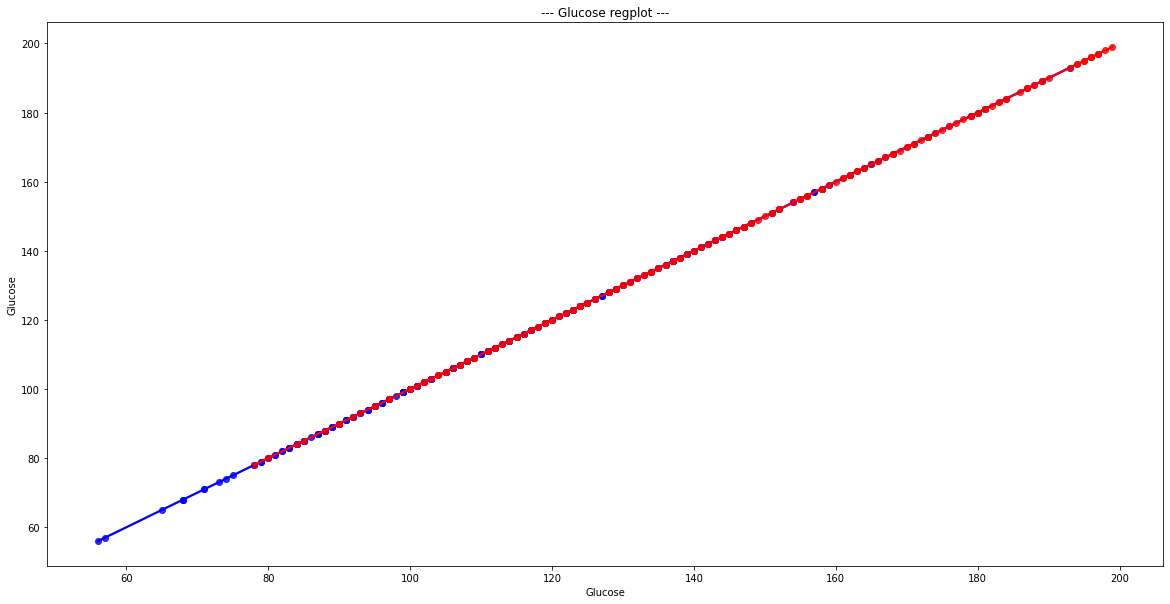

In [15]:
# Let's look closer at these Glucose vs BMI and their relative distribution to the Outcome in a regression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='Glucose', y='Glucose', data=df_bal[df_bal['Outcome'] == 0], color='blue')
sns.regplot(x='Glucose', y='Glucose', data=df_bal[df_bal['Outcome'] == 1], color='red')
plt.title('--- Glucose regplot ---')
plt.show

The above figures proves that using Glucose level and BMI we can separate the two classess

# --------- From this line on work in progress

In [16]:

def categorizer(val):
    """ Creates categories """
    bins = [25, 40, 55, 70]
    cat = 0
    for x in bins:
        if cat == 0:
            if val <= int(x):
                return int(x)

categorizer(51)

55

In [17]:
df_bal['age_cat'] = df_bal.Age.apply(categorizer)

In [18]:
df_bal

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_cat
0,6,148,72,35,0,33.6,0.627,50,1,55.0
2,8,183,64,0,0,23.3,0.672,32,1,40.0
4,0,137,40,35,168,43.1,2.288,33,1,40.0
6,3,78,50,32,88,31.0,0.248,26,1,40.0
8,2,197,70,45,543,30.5,0.158,53,1,55.0
...,...,...,...,...,...,...,...,...,...,...
430,2,99,0,0,0,22.2,0.108,23,0,25.0
137,0,93,60,25,92,28.7,0.532,22,0,25.0
558,11,103,68,40,0,46.2,0.126,42,0,55.0
698,4,127,88,11,155,34.5,0.598,28,0,40.0


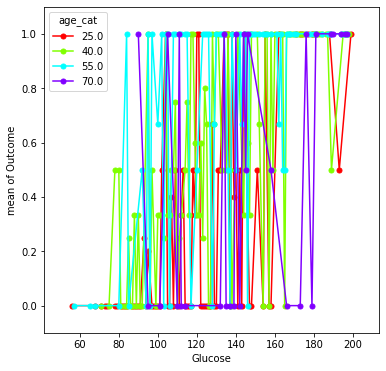

In [19]:
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=df_bal['Glucose'],
    trace=df_bal['age_cat'],
    response=df_bal['Outcome'],
    ms=10,
    ax=ax,
)